## Preparing new samples


ORIGINAL IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



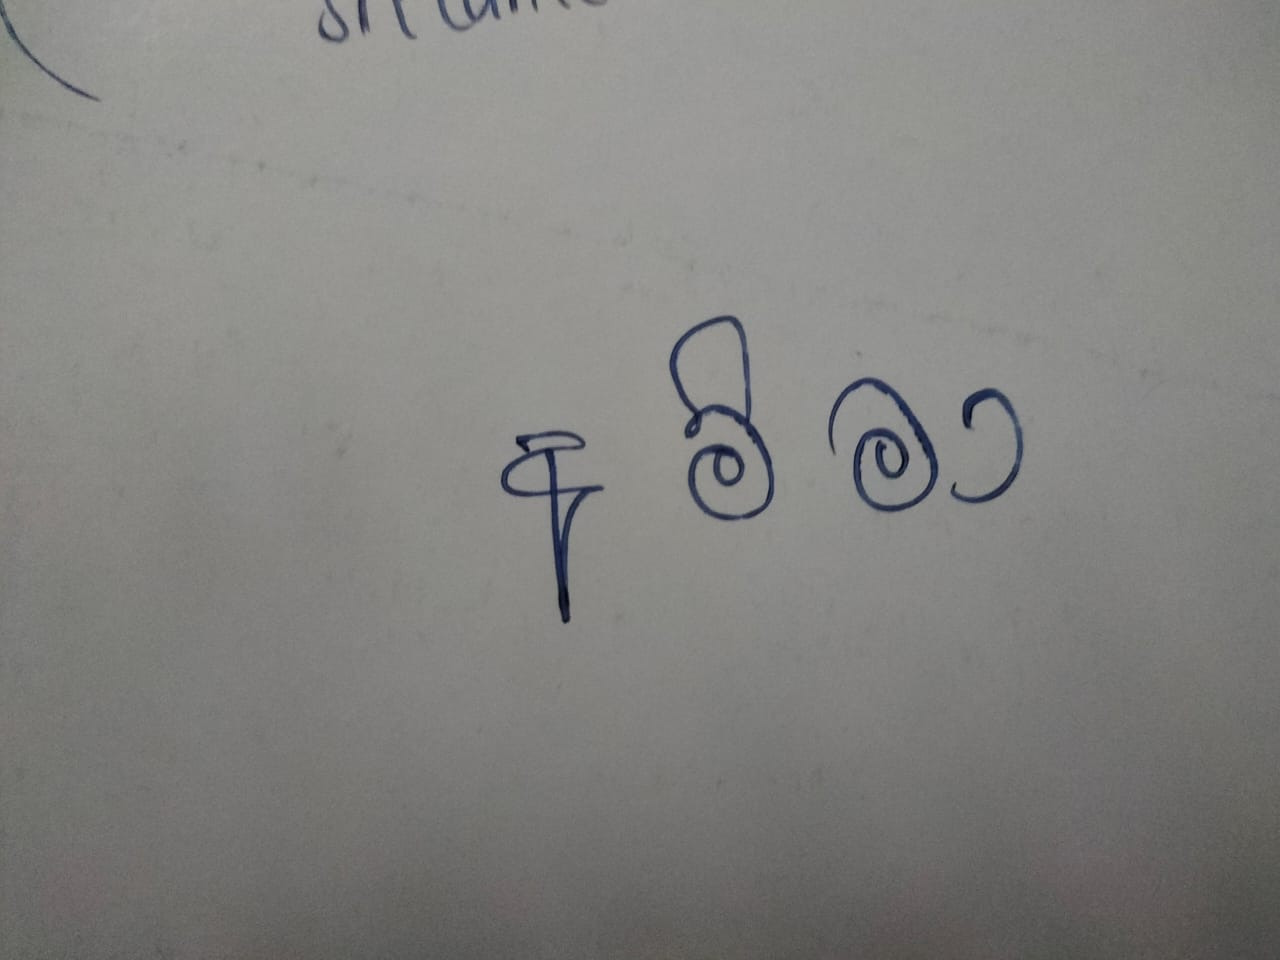


RESIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



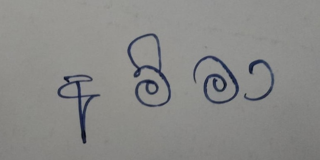


GRAYSCALE IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



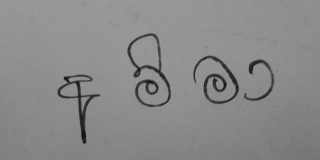

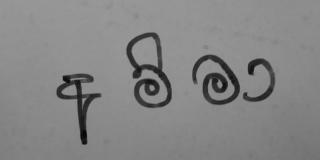


CONTRAST ENHANCED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



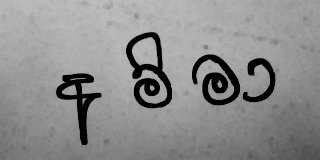


CONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->



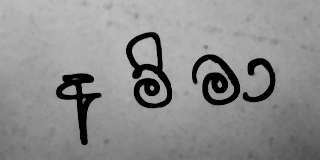


BINARIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->



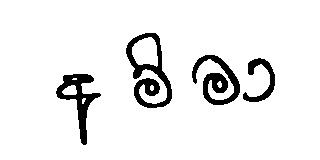

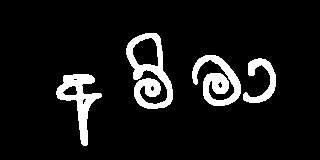

In [4]:
from IPython.display import display, Image
from PIL import Image
import numpy as np
import cv2
from PIL import ImageEnhance 

# Path to your image file
image1_path = 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/code/CNN/Development/SampleImages/amma.jpg'  # Replace 'example_image.jpg' with the actual filename

print("\nORIGINAL IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
# Display the image
display(Image(filename=image1_path))

# Crop -----------------------------------------------------------------------------------//

# def crop_and_display(input_path, crop_box):
#     """
#     Crop an image and display both the original and cropped images.
    
#     Args:
#         input_path (str): Path to the input image file.
#         crop_box (tuple): A tuple (left, upper, right, lower) defining the
#                          pixel coordinates of the crop box.
#     """
#     image = Image.open(input_path)
    
#     # Display original image
#     print("Original Image:")
    
#     # image.show()
    
#     # Crop image
#     cropped_image = image.crop(crop_box)
    
#     # Display cropped image
#     print("Cropped Image:")
#     display(cropped_image)
#     display(image)
#     # cropped_image.show()

# Resize ---------------------------------------------------------------------------//


# Path to your original image
original_image = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/code/CNN/Development/SampleImages/amma_cropped.jpg')

# Resize the img to 80x80
resized_image = original_image.resize((320,160))

print("\nRESIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
# Display resized img
display(resized_image)

# Convert to grayscale ---------------------------------------------------------------------------------------------------------------------------------------------------//
grayscale_image = resized_image.convert('L')

print("\nGRAYSCALE IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display grayscale img
display(grayscale_image)


# Convert it to a NumPy array
binary_image_array = np.array(grayscale_image)

# Invert the binary image
inverted_image_array = cv2.bitwise_not(binary_image_array)

# Define the kernel for dilation
kernel_size = 3  # Adjust this value to control the thickness
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform morphological dilation
dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)

# Invert the dilated image back to its original orientation
dilated_image_array = cv2.bitwise_not(dilated_inverted_image_array)

# Convert the dilated NumPy array back to a PIL Image object
dilated_image = Image.fromarray(dilated_image_array)

# Display the dilated image
display(dilated_image)

# Enhace the contrast of grayscale img
enhancer = ImageEnhance.Contrast(dilated_image)
contrast_factor = 3
contrast_enhanced_image = enhancer.enhance(contrast_factor)

print("\nCONTRAST ENHANCED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

display(contrast_enhanced_image)

# Convert contrast_enhanced_image to numpy array
contrast_enhanced_image_array = np.array(contrast_enhanced_image)

# Perform median blur filtering
median_blur_kernel_size = 3  # Keep an Odd value. 
filtered_image = cv2.medianBlur(contrast_enhanced_image_array, median_blur_kernel_size)

# Convert the filtered numpy array back to a PIL Image object
filtered_image_pil = Image.fromarray(filtered_image)

print("\nCONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display the contrast enhanced image after median blur filtering
display(filtered_image_pil)

import cv2 
import numpy as np

# Convert to numpy array
contrast_enhanced_image_array = np.array(filtered_image_pil)

# Perform thresholding to binarize the image
threshold_value = 40
_, binary_image_array = cv2.threshold(contrast_enhanced_image_array, threshold_value, 255, cv2.THRESH_BINARY)

# Convert the binary NumPy array back to a PIL Image Obj
binary_image = Image.fromarray(binary_image_array)

print("\nBINARIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

# Display binary image
display(binary_image)

# Convert it to a NumPy array
binary_image_array = np.array(binary_image)

# Invert the binary image
inverted_image_array = cv2.bitwise_not(binary_image_array)

# Define the kernel for dilation
kernel_size = 2  # Adjust this value to control the thickness
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform morphological dilation
dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)

# Convert the dilated NumPy array back to a PIL Image object
dilated_image = Image.fromarray(dilated_inverted_image_array)

# Display the dilated image
display(dilated_image)

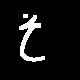

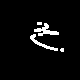

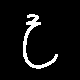

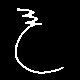

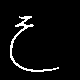

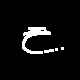

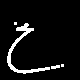

In [7]:
from IPython.display import display, Image
from PIL import Image
import numpy as np
import cv2
from PIL import ImageEnhance 

def preprocess_image(original_image, kernel_size_dialation, full_path):
    # Resize the img to 80x80
    resized_image = original_image.resize((80,80))
    
    # print("\nRESIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
    # Display resized img
    # display(resized_image)
    
    # Convert to grayscale ---------------------------------------------------------------------------------------------------------------------------------------------------//
    grayscale_image = resized_image.convert('L')
    
    # print("\nGRAYSCALE IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")
    
    # Display grayscale img
    # display(grayscale_image)
    
    
    # Convert it to a NumPy array
    binary_image_array = np.array(grayscale_image)
    
    # Invert the binary image
    inverted_image_array = cv2.bitwise_not(binary_image_array)
    
    # Define the kernel for dilation
    kernel_size = 1  # Adjust this value to control the thickness
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Perform morphological dilation
    dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)
    
    # Invert the dilated image back to its original orientation
    dilated_image_array = cv2.bitwise_not(dilated_inverted_image_array)

    # Convert the dilated NumPy array back to a PIL Image object
    dilated_image = Image.fromarray(dilated_image_array)

    # Display the dilated image
    # display(dilated_image)

    # Enhace the contrast of grayscale img
    enhancer = ImageEnhance.Contrast(dilated_image)
    contrast_factor = 3
    contrast_enhanced_image = enhancer.enhance(contrast_factor)

    # print("\nCONTRAST ENHANCED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

    # display(contrast_enhanced_image)

    # Convert contrast_enhanced_image to numpy array
    contrast_enhanced_image_array = np.array(contrast_enhanced_image)

    # Perform median blur filtering
    median_blur_kernel_size = 3  # Keep an Odd value. 
    filtered_image = cv2.medianBlur(contrast_enhanced_image_array, median_blur_kernel_size)

    # Convert the filtered numpy array back to a PIL Image object
    filtered_image_pil = Image.fromarray(filtered_image)

    # print("\nCONTRAST ENHANCED IMAGES AFTER MEDIAN BLUR FILTER -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

    # Display the contrast enhanced image after median blur filtering
    # display(filtered_image_pil)

    # Convert to numpy array
    contrast_enhanced_image_array = np.array(filtered_image_pil)

    # Perform thresholding to binarize the image
    threshold_value = 100
    _, binary_image_array = cv2.threshold(contrast_enhanced_image_array, threshold_value, 255, cv2.THRESH_BINARY)

    # Convert the binary NumPy array back to a PIL Image Obj
    binary_image = Image.fromarray(binary_image_array)

    # print("\nBINARIZED IMAGES -------------------------------------------------------------------------------------------------------------------------------------------------->\n")

    # Display binary image
    # display(binary_image)

    # Convert it to a NumPy array
    binary_image_array = np.array(binary_image)

    # Invert the binary image
    inverted_image_array = cv2.bitwise_not(binary_image_array)

    # Define the kernel for dilation
    kernel_size = kernel_size_dialation  # Adjust this value to control the thickness
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Perform morphological dilation
    dilated_inverted_image_array = cv2.dilate(inverted_image_array, kernel, iterations=1)

    # Convert the dilated NumPy array back to a PIL Image object
    dilated_image = Image.fromarray(dilated_inverted_image_array)

    # Display the PIL Image (optional for visualization)
    display(dilated_image)

    # Convert PIL image to NumPy array before saving
    dilated_image_array = np.array(dilated_image)

    # Save the image using OpenCV
    cv2.imwrite(full_path, dilated_image_array)


# # Path to your original image
# original_image1 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/boo-train-1.jpg')
# original_image2 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/boo-train-2.jpg')
# original_image3 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/boo-train-3.jpg')
# original_image4 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/boo-test-1.jpg')

# original_image5 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/bo-train-1.jpg')
# original_image6 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/bo-train-2.jpg')
# original_image7 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/bo-train-3.jpg')
# original_image8 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/bo-test-1.jpg')

# original_image9 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/choo-train-1.jpg')
# original_image10 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/choo-train-2.jpg')
# original_image11 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/choo-train-3.jpg')
# original_image12 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/choo-test-1.jpg')

# original_image13 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/cho-train-1.jpg')
# original_image14 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/cho-train-2.jpg')
# original_image15 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/cho-train-3.jpg')
# original_image16 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/cho-test-1.jpg')

# original_image17 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/goo-train-1.jpg')
# original_image18 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/goo-train-2.jpg')
# original_image19 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/goo-train-3.jpg')
# original_image20 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/goo-test-1.jpg')

# original_image21 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/go-train-1.jpg')
# original_image22 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/go-train-2.jpg')
# original_image23 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/go-train-3.jpg')
# original_image24 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/go-test-1.jpg')

# original_image25 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/do-train-1.jpg')
# original_image26 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/do-train-2.jpg')
# original_image27 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/do-train-3.jpg')
# original_image28 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/do-test-1.jpg')

# original_image29 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/doo-train-1.jpg')
# original_image30 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/doo-train-2.jpg')
# original_image31 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/doo-train-3.jpg')
# original_image32 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/doo-test-1.jpg')

# original_image33 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/jo-train-1.jpg')
# original_image34 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/jo-train-2.jpg')
# original_image35 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/jo-train-3.jpg')
# original_image36 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/jo-test-1.jpg')

# original_image37 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/joo-train-1.jpg')
# original_image38 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/joo-train-2.jpg')
# # original_image3 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/joo-train-3.jpg')
# original_image39 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/joo-test-1.jpg')

# original_image40 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/loo-train-1.jpg')
# original_image41 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/loo-train-2.jpg')
# original_image42 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/loo-train-3.jpg')
# original_image43 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/loo-test-1.jpg')

# original_image44 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/lo-train-1.jpg')
# original_image45 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/lo-train-2.jpg')
# original_image46 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/lo-train-3.jpg')
# original_image47 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/lo-test-1.jpg')

# original_image48 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/mo-train-1.jpg')
# original_image49 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/mo-train-2.jpg')
# original_image50 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/mo-train-3.jpg')
# original_image51 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/mo-test-1.jpg')

# original_image52 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/moo-train-1.jpg')
# original_image53 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/moo-train-2.jpg')
# original_image54 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/moo-train-3.jpg')
# original_image55 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/moo-test-1.jpg')

# original_image56 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-train-1.jpg')
# original_image57 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-train-2.jpg')
# original_image58 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-train-3.jpg')
# original_image59 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-train-4.jpg')
# original_image60 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-train-5.jpg')
# original_image61 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-train-6.jpg')
# original_image62 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-test-1.jpg')
# original_image63 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-test-2.jpg')
# original_image64 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/q-test-3.jpg')

original_image65 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-train-1.jpg')
original_image66 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-train-2.jpg')
original_image67 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-train-3.jpg')
original_image68 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-train-4.jpg')
original_image69 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-train-5.jpg')
original_image70 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-train-6.jpg')
original_image71 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-test-1.jpg')
original_image72 = Image.open('C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/ade-test-2.jpg')

# preprocess_image(original_image1, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/158/boo-train-1.jpg')
# preprocess_image(original_image2, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/158/boo-train-2.jpg')
# # preprocess_image(original_image3, 4)
# preprocess_image(original_image4, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/158/boo-test-1.jpg')

# preprocess_image(original_image5, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/159/bo-train-1.jpg')
# preprocess_image(original_image6, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/159/bo-train-2.jpg')
# preprocess_image(original_image7, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/159/bo-train-3.jpg')
# preprocess_image(original_image8, 1,'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/159/bo-test-1.jpg')

# preprocess_image(original_image9, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/47/choo-train-1.jpg')
# preprocess_image(original_image10, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/47/choo-train-2.jpg')
# preprocess_image(original_image11, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/47/choo-train-3.jpg')
# preprocess_image(original_image12, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/47/choo-test-1.jpg')

# preprocess_image(original_image13, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/49/cho-train-1.jpg')
# preprocess_image(original_image14, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/49/cho-train-2.jpg')
# preprocess_image(original_image15, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/49/cho-train-3.jpg')
# preprocess_image(original_image16, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/49/cho-test-1.jpg')

# preprocess_image(original_image17, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/34/goo-train-1.jpg')
# preprocess_image(original_image18, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/34/goo-train-2.jpg')
# preprocess_image(original_image19, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/34/goo-train-3.jpg')
# preprocess_image(original_image20, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/34/goo-test-1.jpg')

# preprocess_image(original_image21, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/35/go-train-1.jpg')
# preprocess_image(original_image22, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/35/go-train-2.jpg')
# preprocess_image(original_image23, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/35/go-train-3.jpg')
# preprocess_image(original_image24, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/35/go-test-1.jpg')

# preprocess_image(original_image25, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/88/do-train-1.jpg')
# preprocess_image(original_image26, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/88/do-train-2.jpg')
# preprocess_image(original_image27, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/88/do-train-3.jpg')
# preprocess_image(original_image28, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/88/do-test-1.jpg')

# preprocess_image(original_image29, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/86/doo-train-1.jpg')
# preprocess_image(original_image30, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/86/doo-train-2.jpg')
# preprocess_image(original_image31, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/86/doo-train-3.jpg')
# preprocess_image(original_image32, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/86/doo-test-1.jpg')

# preprocess_image(original_image33, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/437/jo-train-1.jpg')
# preprocess_image(original_image34, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/437/jo-train-2.jpg')
# preprocess_image(original_image35, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/437/jo-train-3.jpg')
# preprocess_image(original_image36, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/437/jo-train-1.jpg')

# preprocess_image(original_image37, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/435/joo-train-1.jpg')
# preprocess_image(original_image38, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/435/joo-train-2.jpg')
# preprocess_image(original_image39, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/435/joo-test-1.jpg')

# preprocess_image(original_image40, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/207/loo-train-1.jpg')
# preprocess_image(original_image41, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/207/loo-train-2.jpg')
# preprocess_image(original_image42, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/207/loo-train-3.jpg')
# preprocess_image(original_image43, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/207/loo-test-1.jpg')

# preprocess_image(original_image44, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/218/lo-train-1.jpg')
# preprocess_image(original_image45, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/218/lo-train-2.jpg')
# preprocess_image(original_image46, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/218/lo-train-3.jpg')
# preprocess_image(original_image47, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/218/lo-test-1.jpg')

# preprocess_image(original_image48, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/174/mo-train-1.jpg')
# preprocess_image(original_image49, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/174/mo-train-2.jpg')
# preprocess_image(original_image50, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/174/mo-train-3.jpg')
# preprocess_image(original_image51, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/174/mo-test-1.jpg')

# preprocess_image(original_image52, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/173/moo-train-1.jpg')
# preprocess_image(original_image53, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/173/moo-train-2.jpg')
# preprocess_image(original_image54, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/173/moo-train-3.jpg')
# # preprocess_image(original_image55, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/173/moo-test-1.jpg')

# preprocess_image(original_image56, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/453/q-train-1.jpg')
# preprocess_image(original_image57, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/453/q-train-2.jpg')
# preprocess_image(original_image58, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/453/q-train-3.jpg')
# preprocess_image(original_image59, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/453/q-train-4.jpg')
# preprocess_image(original_image60, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/453/q-train-5.jpg')
# preprocess_image(original_image61, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/453/q-train-6.jpg')
# preprocess_image(original_image62, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/453/q-test-1.jpg')
# preprocess_image(original_image63, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/453/q-test-2.jpg')
# preprocess_image(original_image63, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/453/q-test-3.jpg')


preprocess_image(original_image65, 3, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/454/ade-train-2.jpg')
preprocess_image(original_image66, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/454/ade-train-3.jpg')
preprocess_image(original_image67, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/454/ade-train-4.jpg')
preprocess_image(original_image68, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/454/ade-train-5.jpg')
preprocess_image(original_image69, 1, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/train/454/ade-train-6.jpg')
preprocess_image(original_image70, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/454/q-test-1.jpg')
preprocess_image(original_image71, 2, 'C:/Users/cmsmc/Desktop/Projects/SinhalaTranslator/Work/Dataset454/test/454/q-test-2.jpg')
